In [1]:
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Dictionary to store the data in
historical_data = {}

file_name = 'data/AMZN_AAPL_BTCUSD_SPY.json'

In [3]:
with open("data/AMZN_AAPL_BTCUSD_SPY.json", 'r') as f:
    all_data = json.load(f)

In [4]:
all_data.keys()

dict_keys(['amzn', 'aapl', 'btc-usd', 'spy'])

In [5]:
spy = pd.DataFrame(all_data['spy']).transpose()
spy['date'] = pd.to_datetime(spy['date'], unit='ms')
spy = spy.set_index('date')

In [6]:
spy

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
2000-01-03,148.25,148.25,143.875,145.438,96.855,8164300,SPY
2000-01-04,143.531,144.062,139.641,139.75,93.0674,8089800,SPY
2000-01-05,139.938,141.531,137.25,140,93.2339,12177900,SPY
2000-01-06,139.625,141.5,137.75,137.75,91.7355,6227200,SPY
2000-01-07,140.312,145.75,140.062,145.75,97.0631,8066500,SPY
...,...,...,...,...,...,...,...
2020-12-23,368.28,369.62,367.22,367.57,362.735,46201400,SPY
2020-12-24,368.08,369.03,367.45,369,364.146,26457900,SPY
2020-12-28,371.74,372.59,371.07,372.17,367.274,39000400,SPY


#### Which days did the market go up or down?

In [7]:
def rel_change(x):
    return (x[1] - x[0])/x[0]

In [8]:
spytt = spy[['adjclose']]
spytt = spytt.assign(change=spytt.rolling(2).apply(rel_change, raw=False))
spytt

,adjclose,change
date,,
2000-01-03,96.855,NaN
2000-01-04,93.0674,-0.039106
2000-01-05,93.2339,0.001789
2000-01-06,91.7355,-0.016071
2000-01-07,97.0631,0.058076
...,...,...
2020-12-23,362.735,0.000899
2020-12-24,364.146,0.003890
2020-12-28,367.274,0.008591


In [9]:
spytt['day_in_year'] = spytt.index.dayofyear
spytt

,adjclose,change,day_in_year
date,,,
2000-01-03,96.855,NaN,3
2000-01-04,93.0674,-0.039106,4
2000-01-05,93.2339,0.001789,5
2000-01-06,91.7355,-0.016071,6
2000-01-07,97.0631,0.058076,7
...,...,...,...
2020-12-23,362.735,0.000899,358
2020-12-24,364.146,0.003890,359
2020-12-28,367.274,0.008591,363


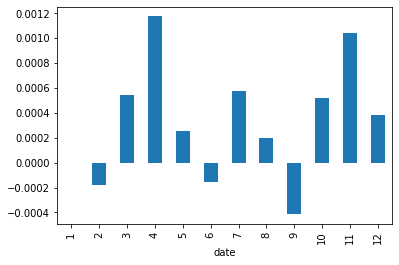

In [10]:
spytt['change'].astype('float64').groupby(spytt.index.month).mean().plot.bar()

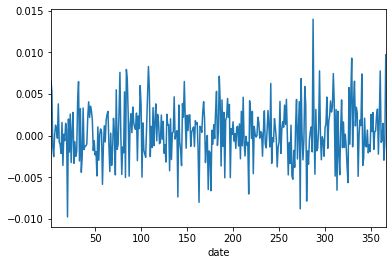

In [11]:
spytt['change'].astype('float64').groupby(spytt.index.dayofyear).mean().plot()

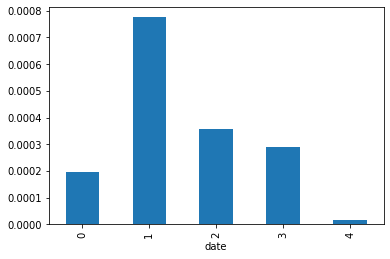

In [12]:
spytt['change'].astype('float64').groupby(spytt.index.dayofweek).mean().plot.bar()

### Now for bitcoin graphs!

In [13]:
btcusd = pd.DataFrame(all_data['btc-usd']).transpose()
btcusd['date'] = pd.to_datetime(btcusd['date'], unit='ms')
btcusd = btcusd.set_index('date')

In [14]:
btcusd

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800,BTC-USD
2014-09-18,456.86,456.86,413.104,424.44,424.44,34483200,BTC-USD
2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700,BTC-USD
2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600,BTC-USD
2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100,BTC-USD
...,...,...,...,...,...,...,...
2020-12-27,26439.4,28288.8,25922.8,26272.3,26272.3,66479895605,BTC-USD
2020-12-28,26280.8,27389.1,26207.6,27084.8,27084.8,49056742893,BTC-USD
2020-12-29,27081.8,27370.7,25987.3,27362.4,27362.4,45265946774,BTC-USD


In [16]:
btctt = btcusd[['adjclose']]
btctt = btctt.assign(change=btctt.rolling(2).apply(rel_change, raw=False))
btctt

,adjclose,change
date,,
2014-09-17,457.334,NaN
2014-09-18,424.44,-0.071926
2014-09-19,394.796,-0.069843
2014-09-20,408.904,0.035735
2014-09-21,398.821,-0.024659
...,...,...
2020-12-27,26272.3,-0.006231
2020-12-28,27084.8,0.030927
2020-12-29,27362.4,0.010250


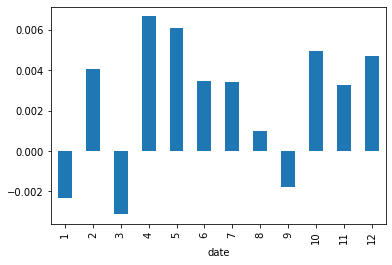

In [18]:
btctt['change'].astype('float64').groupby(btctt.index.month).mean().plot.bar()

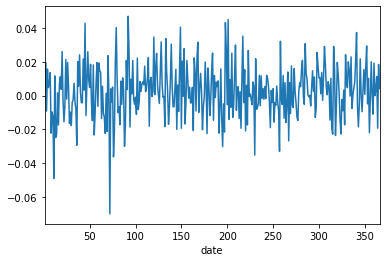

In [19]:
btctt['change'].astype('float64').groupby(btctt.index.dayofyear).mean().plot()

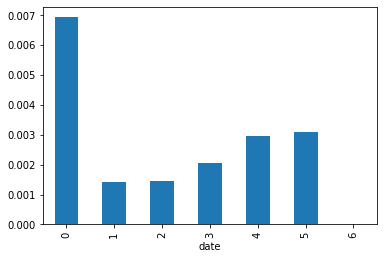

In [20]:
btctt['change'].astype('float64').groupby(btctt.index.dayofweek).mean().plot.bar()

In [28]:
btctt['day_of_week'] = btctt.index.dayofweek

In [48]:
testdf = {}
for i in range(7):
    testdf[i] = btctt[btctt.index.dayofweek == i]

testdf

{0:            adjclose    change  day_of_week
 date                                      
 2014-09-22  402.152  0.008352            0
 2014-09-29  375.467 -0.004544            0
 2014-10-06  330.079  0.029856            0
 2014-10-13  390.414  0.031343            0
 2014-10-20  382.845 -0.017202            0
 ...             ...       ...          ...
 2020-11-30  19625.8  0.079678            0
 2020-12-07  19191.6 -0.007934            0
 2020-12-14  19246.6  0.005447            0
 2020-12-21  22803.1 -0.028718            0
 2020-12-28  27084.8  0.030927            0
 
 [328 rows x 3 columns], 1:            adjclose    change  day_of_week
 date                                      
 2014-09-23  435.791  0.083647            1
 2014-09-30  386.944  0.030567            1
 2014-10-07  336.187  0.018505            1
 2014-10-14   400.87  0.026782            1
 2014-10-21  386.475  0.009482            1
 ...             ...       ...          ...
 2020-12-01    18803 -0.041926            1


In [47]:
testdf = pd.DataFrame(testdf, index='adjclose change day_of_week'.split())
testdf

,0,1,2,3,4,5,6
adjclose,"(a, d, j, c, l, o, s, e)","(a, d, j, c, l, o, s, e)","(a, d, j, c, l, o, s, e)","(a, d, j, c, l, o, s, e)","(a, d, j, c, l, o, s, e)","(a, d, j, c, l, o, s, e)","(a, d, j, c, l, o, s, e)"
change,"(c, h, a, n, g, e)","(c, h, a, n, g, e)","(c, h, a, n, g, e)","(c, h, a, n, g, e)","(c, h, a, n, g, e)","(c, h, a, n, g, e)","(c, h, a, n, g, e)"
day_of_week,"(d, a, y, _, o, f, _, w, e, e, k)","(d, a, y, _, o, f, _, w, e, e, k)","(d, a, y, _, o, f, _, w, e, e, k)","(d, a, y, _, o, f, _, w, e, e, k)","(d, a, y, _, o, f, _, w, e, e, k)","(d, a, y, _, o, f, _, w, e, e, k)","(d, a, y, _, o, f, _, w, e, e, k)"


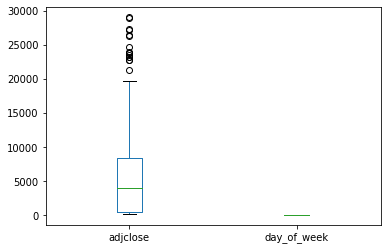

In [38]:
btctt[['adjclose', 'day_of_week']].astype('float64').plot.box(by='day_of_week')